# Plotting from live data

Import the usual suspects:

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

We will also requre tools from these Python libraries:

In [3]:
import psutil
from time import sleep
from multiprocessing import Process

We write a function that will monitor the instantaneous load on each core of the current computer's processor and plot this using matplotlib.

In [4]:
def htop():
    # HACK: printing makes figure appear in notebook
    print('')
    fig, ax = plt.subplots(1,1)
    #plt.ion()

    fig.show()
    fig.canvas.draw()
    ncpu = psutil.cpu_count()
    while True:
        ax.clear()
        ax.barh(range(ncpu), psutil.cpu_percent(percpu=True))

        ax.set_xlim(0,100)
        ax.set_xlabel('CPU %')

        ax.set_yticks(range(ncpu))

        fig.canvas.draw()
        sleep(1)

We call this function using a thread so that it will continue running in the background whilst we continue doing other things in the notebook.

<IPython.core.display.Javascript object>


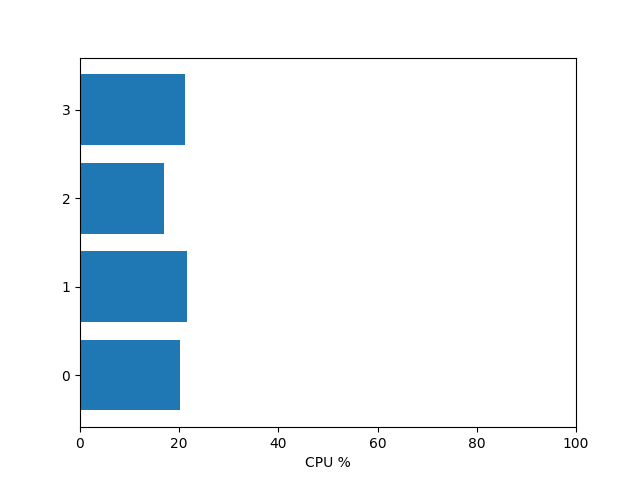

Process Process-1:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-4-45317006acea>", line 20, in htop
    sleep(1)
KeyboardInterrupt


In [5]:
## MAIN
t = Process(target=htop)
t.daemon = True
t.start()